In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path


plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["axes.grid"] = True


In [2]:
df = pd.read_csv('data.csv', parse_dates=["ts"])

# Ordenar temporalmente
df = df.sort_values("ts")

# Establecer índice temporal
df.set_index("ts", inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 345600 entries, 2025-10-14 15:05:29.502750+00:00 to 2026-02-11 15:04:29.502750+00:00
Data columns (total 38 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   board_mqtt_id         345600 non-null  object 
 1   equipment_id          345600 non-null  int64  
 2   pos_id                345600 non-null  int64  
 3   client_id             345600 non-null  int64  
 4   category_name         345600 non-null  object 
 5   programmer_model      345600 non-null  object 
 6   compressor_model      345600 non-null  object 
 7   refrigerant_code      345600 non-null  object 
 8   municipality_name     345600 non-null  object 
 9   department_name       345600 non-null  object 
 10  probe_1               345600 non-null  float64
 11  probe_2               345600 non-null  float64
 12  probe_3               345600 non-null  float64
 13  probe_4               345600 non-null  int64

In [ ]:
df.head()

In [3]:
df_eq = df[df["equipment_id"] == 12].copy()
df_eq = df_eq.sort_index()

df_eq = df_eq.rename(columns={
    "probe_1": "temp_cabina",
    "probe_2": "temp_evaporador",
    "probe_3": "temp_condensador",
    "status_defrost": "deshielo",
    "status_door": "puerta_abierta",
    "setpoint": "setpoint_objetivo",
    "economic_setpoint": "setpoint_economico"
})

In [4]:
df_eq.columns


Index(['board_mqtt_id', 'equipment_id', 'pos_id', 'client_id', 'category_name',
       'programmer_model', 'compressor_model', 'refrigerant_code',
       'municipality_name', 'department_name', 'temp_cabina',
       'temp_evaporador', 'temp_condensador', 'probe_4', 'probe_5',
       'puerta_abierta', 'deshielo', 'setpoint_objetivo', 'setpoint_economico',
       'alarm_bit0', 'alarm_bit1', 'alarm_bit2', 'alarm_bit3', 'alarm_bit4',
       'alarm_bit5', 'alarm_bit6', 'alarm_bit7', 'alarm_bit8', 'alarm_bit9',
       'alarm_bit10', 'alarm_bit11', 'alarm_bit12', 'alarm_bit13',
       'alarms_bitfield', 'has_any_alarm', 'is_alarm_critical',
       'is_alarm_temperature', 'is_alarm_warning'],
      dtype='object')

In [5]:
df_eq.describe()


,equipment_id,pos_id,client_id,temp_cabina,temp_evaporador,temp_condensador,probe_4,probe_5,puerta_abierta,deshielo,...,alarm_bit5,alarm_bit6,alarm_bit7,alarm_bit8,alarm_bit9,alarm_bit10,alarm_bit11,alarm_bit12,alarm_bit13,alarms_bitfield
count,172800.0,172800.0,172800.0,172800.000000,172800.000000,172800.000000,172800.0,172800.0,172800.000000,172800.000000,...,172800.000000,172800.0,172800.000000,172800.0,172800.000000,172800.000000,172800.000000,172800.000000,172800.0,172800.000000
mean,12.0,1.0,5.0,-3.666732,-12.216903,35.791652,0.0,0.0,0.013171,0.041296,...,0.179826,0.0,0.013171,0.0,0.104896,0.054387,0.147234,0.054387,0.0,646.012674
std,0.0,0.0,0.0,18.094966,28.114250,10.023177,0.0,0.0,0.114008,0.198975,...,0.384044,0.0,0.114008,0.0,0.306420,0.226780,0.354340,0.226780,0.0,1291.345829
min,12.0,1.0,5.0,-50.000000,-51.360000,16.650000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,12.0,1.0,5.0,-12.160000,-34.380000,28.920000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,12.0,1.0,5.0,-9.150000,-22.715000,34.940000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,12.000000
75%,12.0,1.0,5.0,14.810000,5.300000,41.020000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,552.000000
max,12.0,1.0,5.0,27.380000,85.000000,70.320000,0.0,0.0,1.000000,1.000000,...,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0,5128.000000


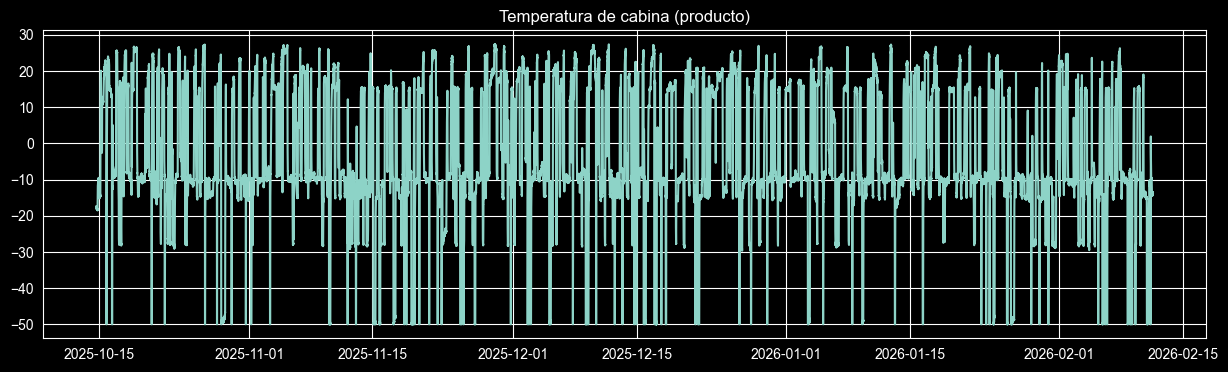

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,4))
plt.plot(df_eq["temp_cabina"])
plt.title("Temperatura de cabina (producto)")
plt.show()


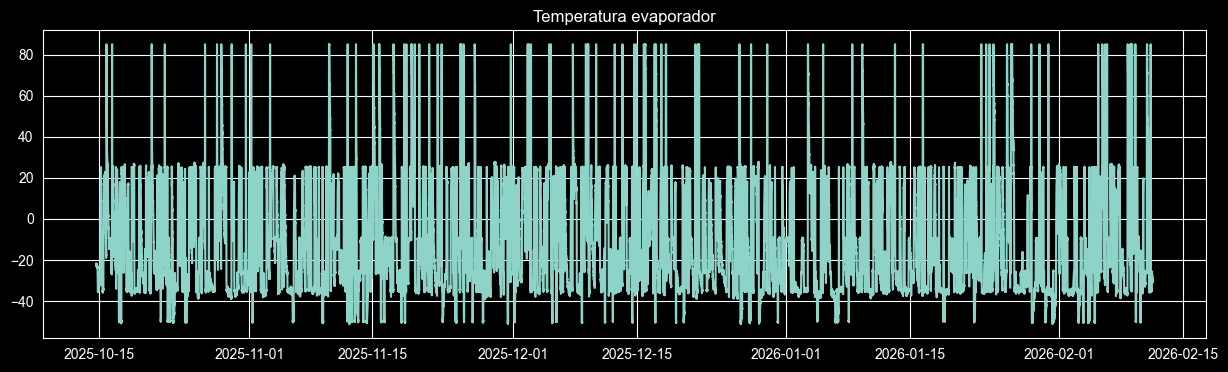

In [7]:
plt.figure(figsize=(15,4))
plt.plot(df_eq["temp_evaporador"])
plt.title("Temperatura evaporador")
plt.show()


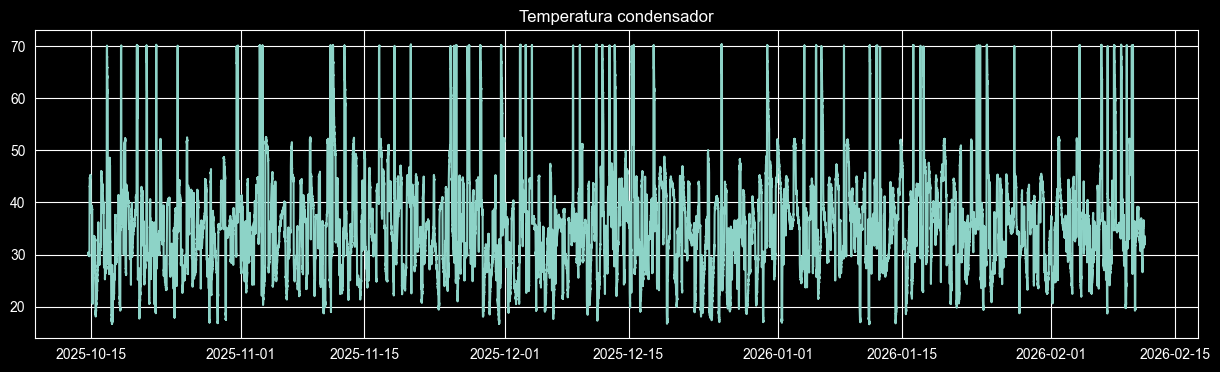

In [8]:
plt.figure(figsize=(15,4))
plt.plot(df_eq["temp_condensador"])
plt.title("Temperatura condensador")
plt.show()


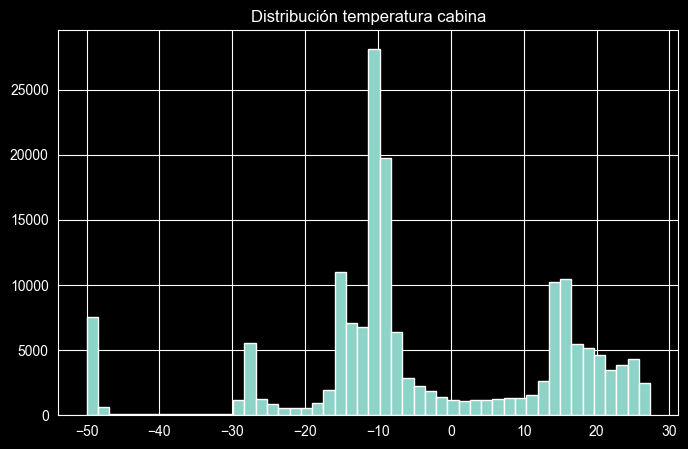

In [9]:
df_eq["temp_cabina"].hist(bins=50)
plt.title("Distribución temperatura cabina")
plt.show()


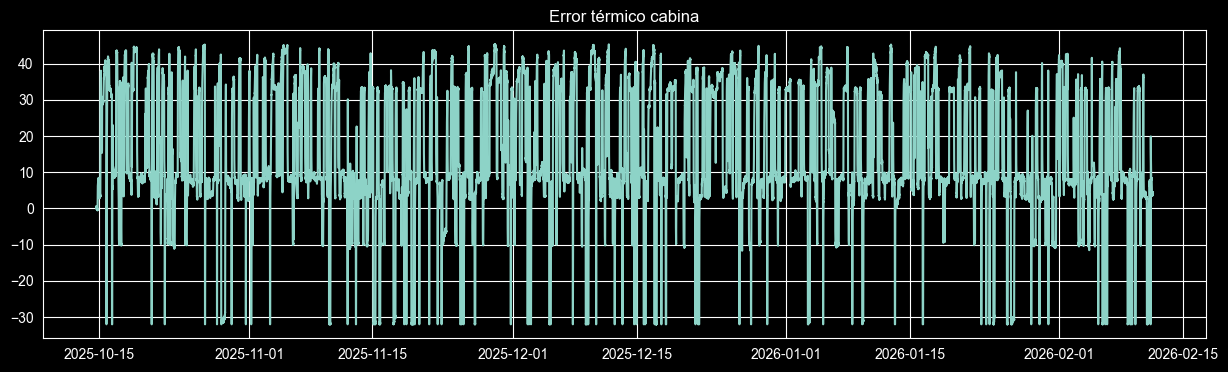

In [10]:
df_eq["error_cabina"] = df_eq["temp_cabina"] - df_eq["setpoint_objetivo"]

plt.figure(figsize=(15,4))
plt.plot(df_eq["error_cabina"])
plt.title("Error térmico cabina")
plt.show()


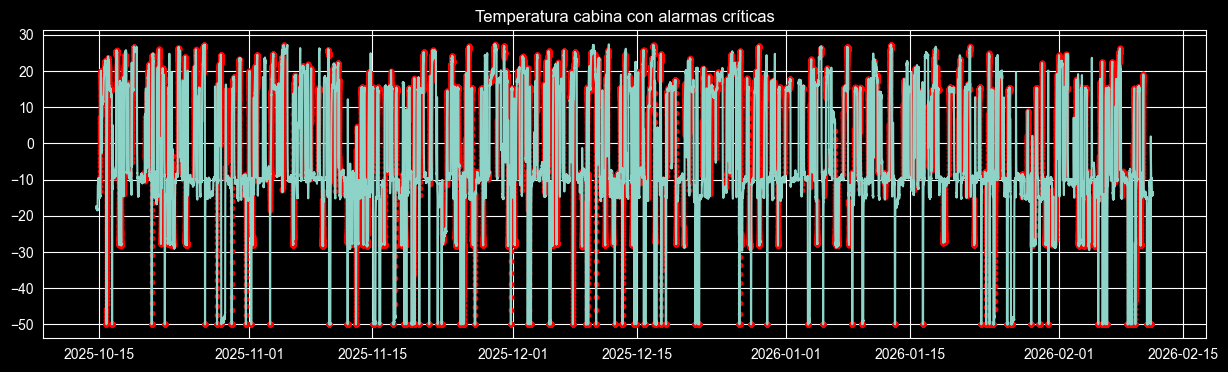

In [11]:
plt.figure(figsize=(15,4))
plt.plot(df_eq["temp_cabina"], label="Cabina")

alarms = df_eq[df_eq["is_alarm_critical"] == True]

plt.scatter(alarms.index,
            alarms["temp_cabina"],
            color="red",
            s=10)

plt.title("Temperatura cabina con alarmas críticas")
plt.show()


In [12]:
windows_interp = []
target_length = 500  # longitud fija artificial para todas

for t in alarms.index:
    w = df_eq.loc[t - pd.Timedelta("24h"):t]

    if len(w) < 50:  # evitar ventanas demasiado pequeñas
        continue

    # tiempo relativo en minutos
    time_relative = (w.index - w.index[0]).total_seconds() / 60

    # normalizamos a 0–1
    time_norm = time_relative / time_relative.max()

    # interpolamos a longitud fija
    interp_values = np.interp(
        np.linspace(0,1,target_length),
        time_norm,
        w["error_cabina"]
    )

    windows_interp.append(interp_values)


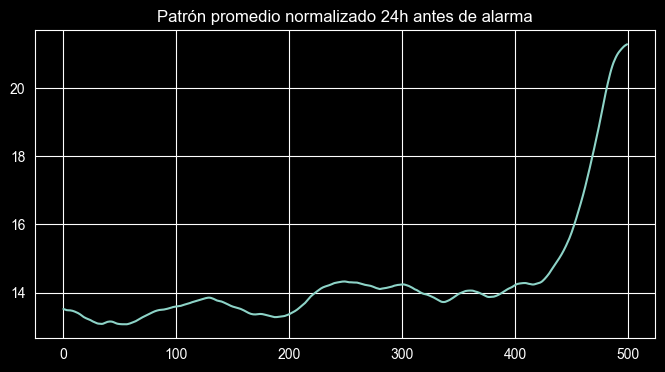

In [13]:
mean_pattern = np.mean(windows_interp, axis=0)

plt.figure(figsize=(8,4))
plt.plot(mean_pattern)
plt.title("Patrón promedio normalizado 24h antes de alarma")
plt.show()


In [14]:
values_before = []
values_normal = []

for t in alarms.index:
    before = df_eq.loc[t - pd.Timedelta("2h"):t]["error_cabina"].mean()
    values_before.append(before)

# Tomamos muestras aleatorias de momentos sin alarma
normal_sample = df_eq[df_eq["is_alarm_critical"] == False]["error_cabina"].sample(len(values_before))
values_normal = normal_sample.values


In [15]:
from scipy.stats import ttest_ind

ttest_ind(values_before, values_normal)


TtestResult(statistic=np.float64(78.37372924498759), pvalue=np.float64(0.0), df=np.float64(99550.0))

<Figure size 800x400 with 0 Axes>

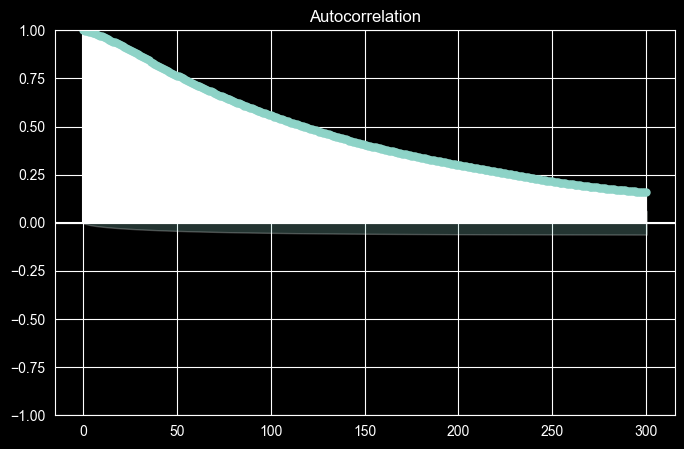

In [16]:
#AUTOCORRELACIÓN
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(8,4))
plot_acf(df_eq["temp_cabina"].dropna(), lags=300)
plt.show()


<Figure size 800x400 with 0 Axes>

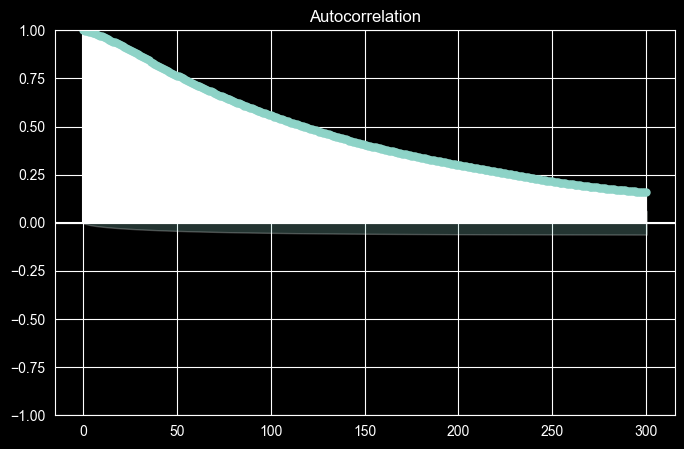

In [17]:
plt.figure(figsize=(8,4))
plot_acf(df_eq["error_cabina"].dropna(), lags=300)
plt.show()


<Figure size 800x400 with 0 Axes>

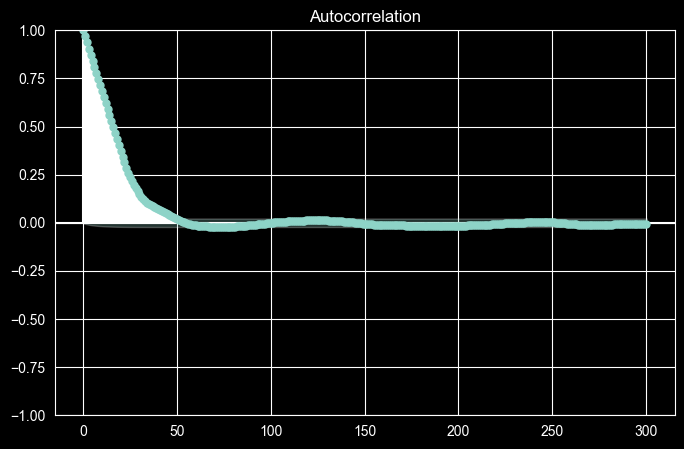

In [18]:
plt.figure(figsize=(8,4))
plot_acf(df_eq["deshielo"].dropna(), lags=300)
plt.show()


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = [
    "temp_cabina",
    "temp_evaporador",
    "temp_condensador",
    "error_cabina",
    "deshielo",
    "puerta_abierta",
    "setpoint_objetivo",
    "setpoint_economico"
]

corr_matrix = df_eq[numeric_cols].corr()


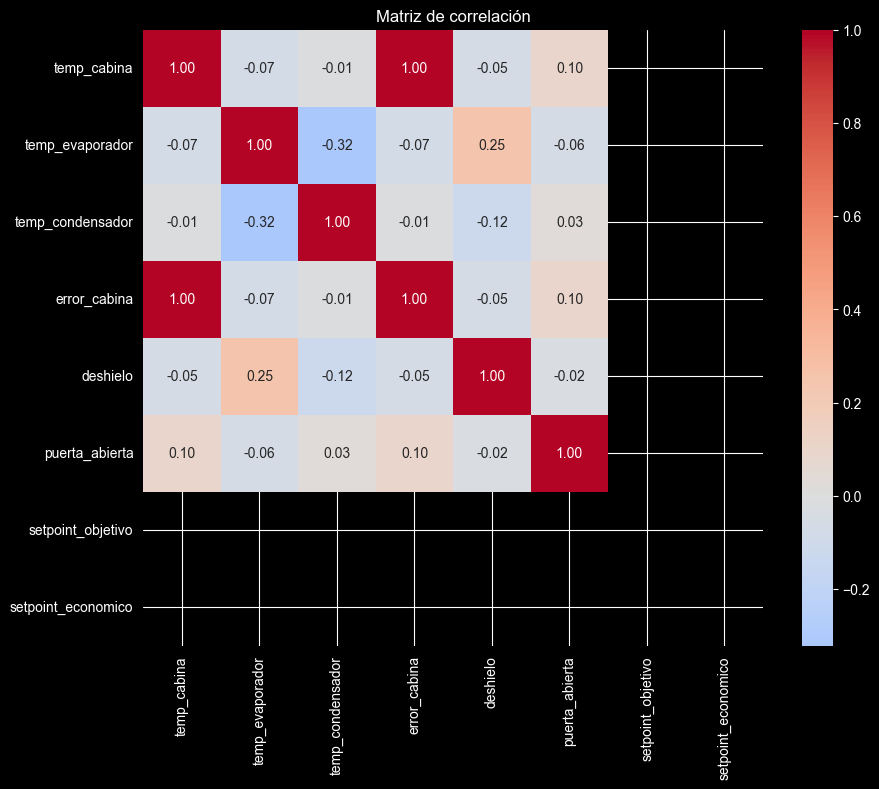

In [20]:
plt.figure(figsize=(10,8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0
)
plt.title("Matriz de correlación")
plt.show()


In [21]:
df_cc = df_eq[[
    "error_cabina",
    "temp_evaporador",
    "temp_condensador",
    'temp_cabina',
    "puerta_abierta",
    "deshielo",
    "is_alarm_critical"
]].dropna()


In [22]:
import numpy as np
import matplotlib.pyplot as plt

def cross_correlation(x, y, max_lag=300):
    lags = range(0, max_lag)
    corr_values = []

    for lag in lags:
        corr = x.corr(y.shift(-lag))
        corr_values.append(corr)

    return lags, corr_values


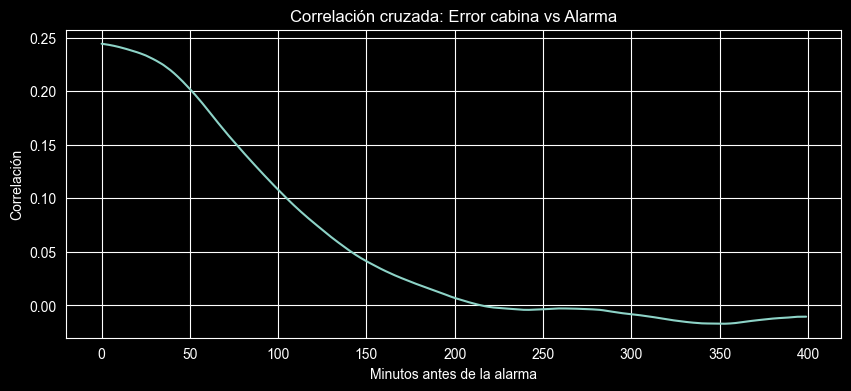

In [23]:
lags, corr_vals = cross_correlation(
    df_cc["error_cabina"],
    df_cc["is_alarm_critical"],
    max_lag=400
)

plt.figure(figsize=(10,4))
plt.plot(lags, corr_vals)
plt.title("Correlación cruzada: Error cabina vs Alarma")
plt.xlabel("Minutos antes de la alarma")
plt.ylabel("Correlación")
plt.show()


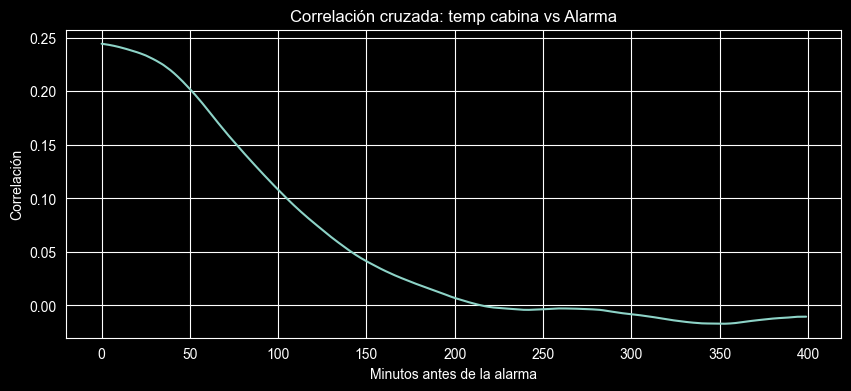

In [24]:
lags, corr_vals = cross_correlation(
    df_cc["temp_cabina"],
    df_cc["is_alarm_critical"],
    max_lag=400
)

plt.figure(figsize=(10,4))
plt.plot(lags, corr_vals)
plt.title("Correlación cruzada: temp cabina vs Alarma")
plt.xlabel("Minutos antes de la alarma")
plt.ylabel("Correlación")
plt.show()


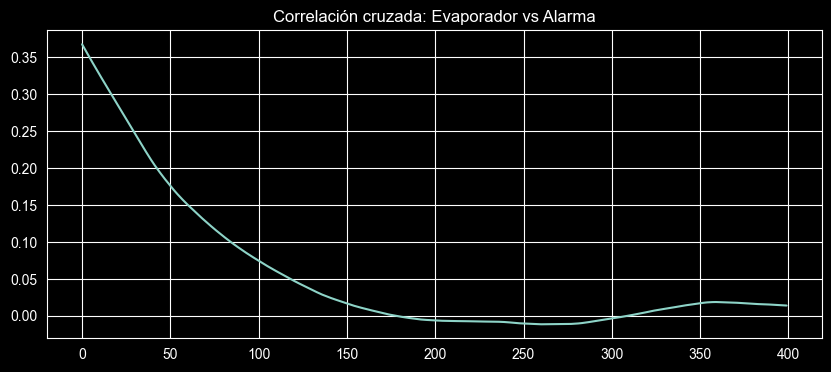

In [25]:
lags, corr_vals = cross_correlation(
    df_cc["temp_evaporador"],
    df_cc["is_alarm_critical"],
    max_lag=400
)

plt.figure(figsize=(10,4))
plt.plot(lags, corr_vals)
plt.title("Correlación cruzada: Evaporador vs Alarma")
plt.show()


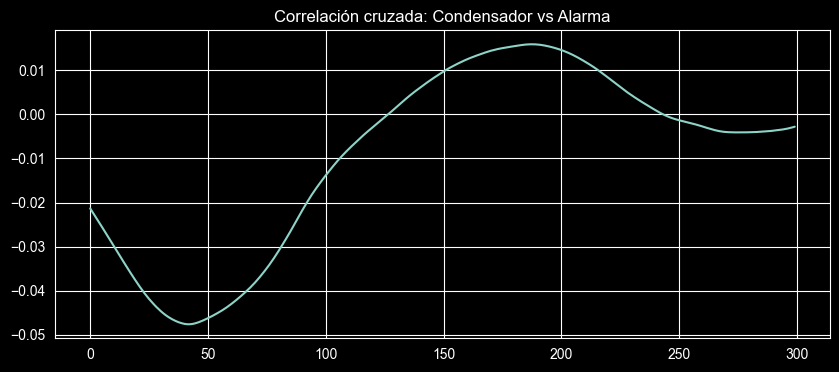

In [26]:
lags, corr_vals = cross_correlation(
    df_cc["temp_condensador"],
    df_cc["is_alarm_critical"],
    max_lag=300
)

plt.figure(figsize=(10,4))
plt.plot(lags, corr_vals)
plt.title("Correlación cruzada: Condensador vs Alarma")
plt.show()


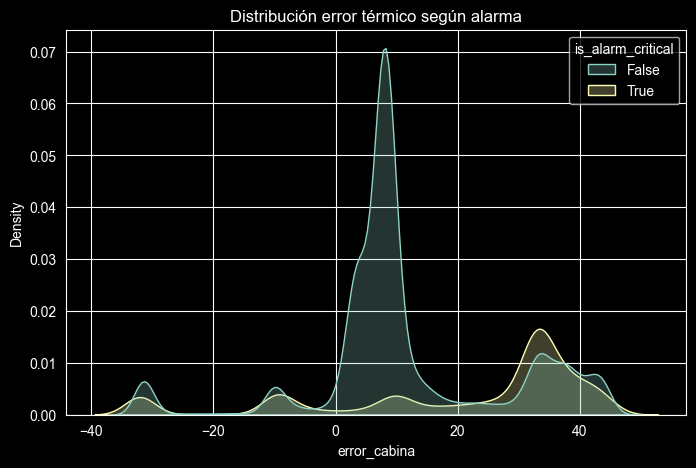

In [27]:
import seaborn as sns

sns.kdeplot(
    data=df_eq,
    x="error_cabina",
    hue="is_alarm_critical",
    fill=True
)
plt.title("Distribución error térmico según alarma")
plt.show()


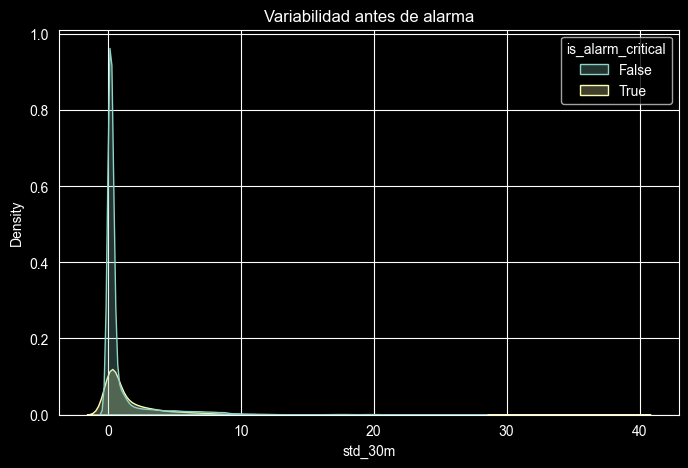

In [28]:
df_eq["std_30m"] = df_eq["error_cabina"].rolling("30min").std()

sns.kdeplot(
    data=df_eq,
    x="std_30m",
    hue="is_alarm_critical",
    fill=True
)
plt.title("Variabilidad antes de alarma")
plt.show()


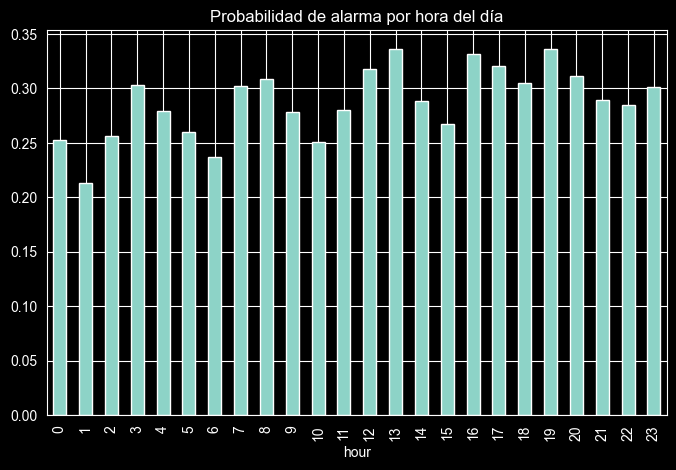

In [29]:
df_eq["hour"] = df_eq.index.hour

alarm_by_hour = df_eq.groupby("hour")["is_alarm_critical"].mean()

alarm_by_hour.plot(kind="bar")
plt.title("Probabilidad de alarma por hora del día")
plt.show()


In [30]:
alarm_times = df_eq[df_eq["is_alarm_critical"]].index
diffs = alarm_times.to_series().diff().dropna()

diffs.describe()


count                        49775
mean     0 days 00:03:27.021998995
std      0 days 00:40:01.005060338
min                0 days 00:01:00
25%                0 days 00:01:00
50%                0 days 00:01:00
75%                0 days 00:01:00
max                1 days 08:05:00
Name: ts, dtype: object

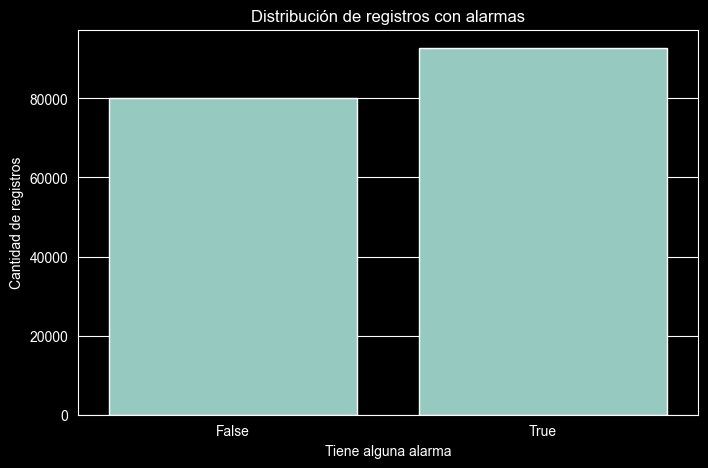

In [43]:
df_eq["has_any_alarm"].value_counts(normalize=True) * 100
sns.countplot(data=df_eq, x="has_any_alarm")
plt.title("Distribución de registros con alarmas")
plt.xlabel("Tiene alguna alarma")
plt.ylabel("Cantidad de registros")
plt.show()


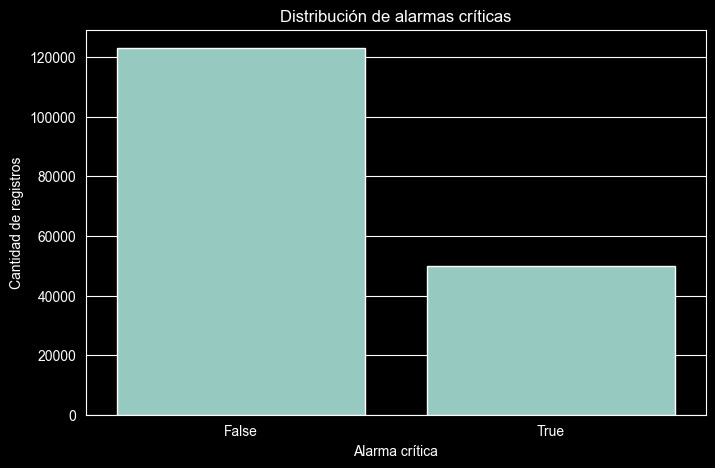

In [44]:
sns.countplot(data=df_eq, x="is_alarm_critical")
plt.title("Distribución de alarmas críticas")
plt.xlabel("Alarma crítica")
plt.ylabel("Cantidad de registros")
plt.show()


In [45]:
##probe 1 cabina (producto)
##probe 2 evaporador (menor a 0)
##probe 3 condensador (arriba o abajo de temp ambien (28))
##status defrost (0 si no estuvo en deshielo, 1 en deshielo)
##setpoint (temperatura objetivo)
##economic setpoint (temperatura objetivo en modo económico)
##hass any alamr (Tiene algo)
##critical cxualquier alarma que considerer apaagr el equipo


df_eq.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 172800 entries, 2025-10-14 15:05:29.502750+00:00 to 2026-02-11 15:04:29.502750+00:00
Data columns (total 41 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   board_mqtt_id         172800 non-null  object 
 1   equipment_id          172800 non-null  int64  
 2   pos_id                172800 non-null  int64  
 3   client_id             172800 non-null  int64  
 4   category_name         172800 non-null  object 
 5   programmer_model      172800 non-null  object 
 6   compressor_model      172800 non-null  object 
 7   refrigerant_code      172800 non-null  object 
 8   municipality_name     172800 non-null  object 
 9   department_name       172800 non-null  object 
 10  temp_cabina           172800 non-null  float64
 11  temp_evaporador       172800 non-null  float64
 12  temp_condensador      172800 non-null  float64
 13  probe_4               172800 non-null  int64

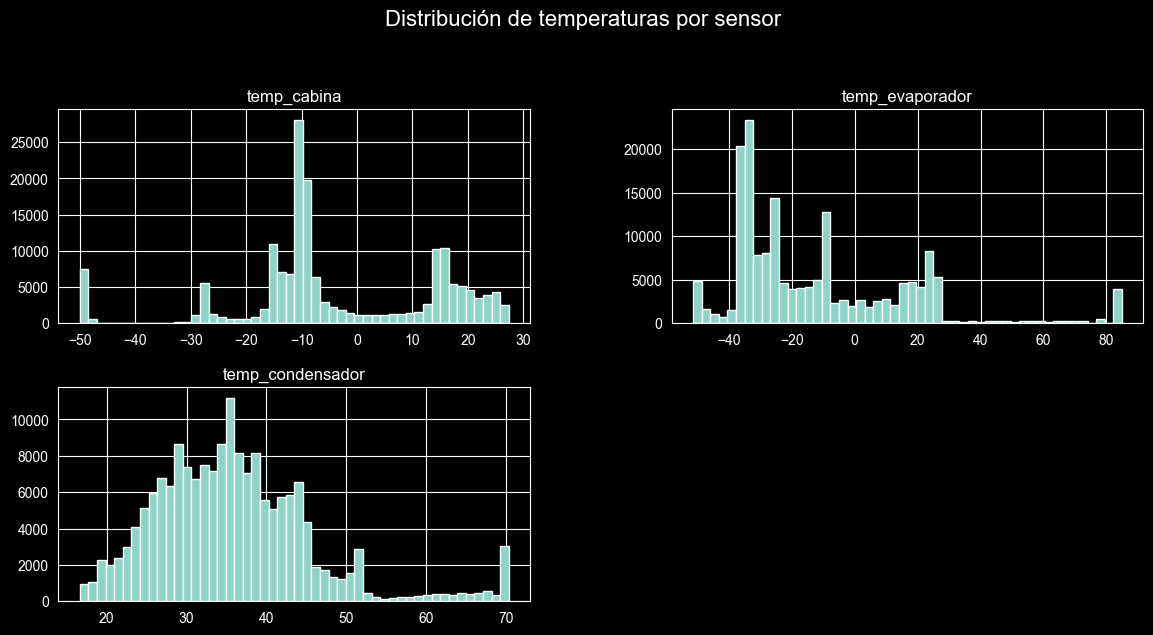

In [47]:
probes = ["temp_cabina", "temp_evaporador", "temp_condensador"]

df_eq[probes].hist(bins=50, layout=(3, 2), figsize=(14, 10))
plt.suptitle("Distribución de temperaturas por sensor", fontsize=16)
plt.show()


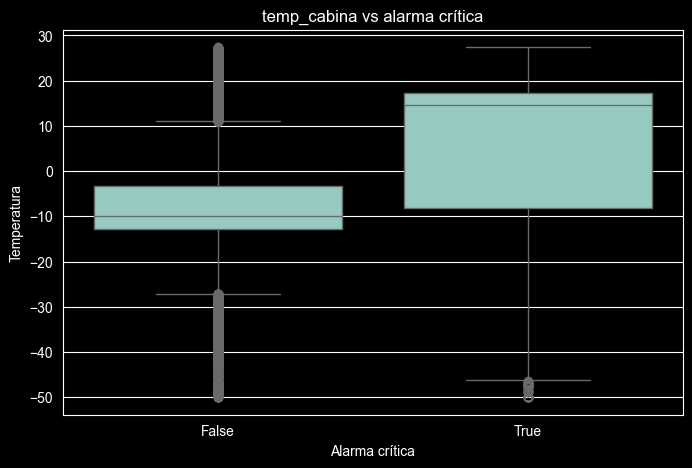

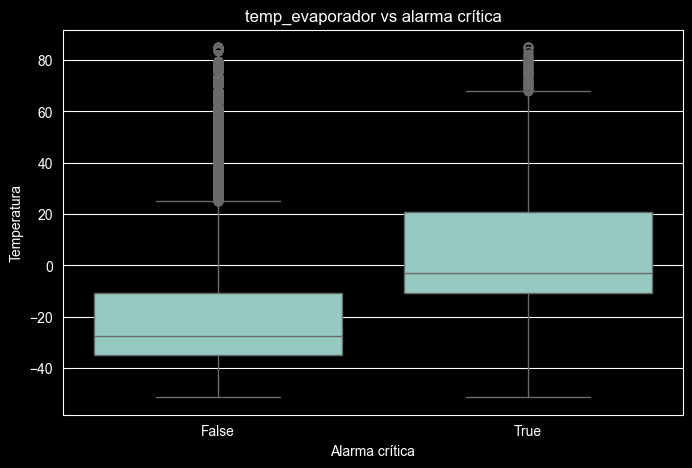

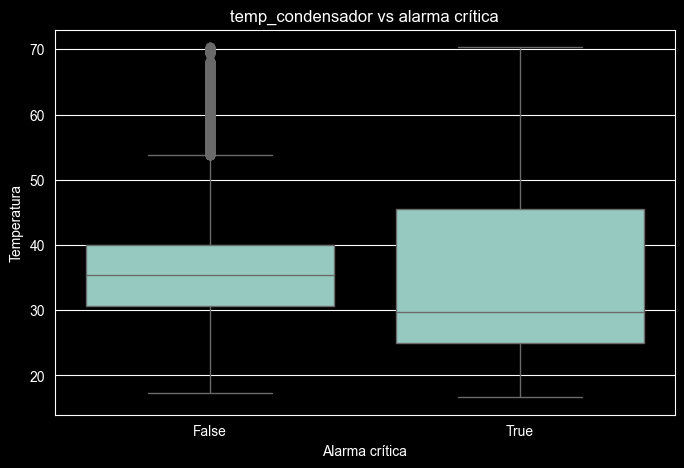

In [48]:
for probe in probes:
    sns.boxplot(
        data=df_eq,
        x="is_alarm_critical",
        y=probe
    )
    plt.title(f"{probe} vs alarma crítica")
    plt.xlabel("Alarma crítica")
    plt.ylabel("Temperatura")
    plt.show()


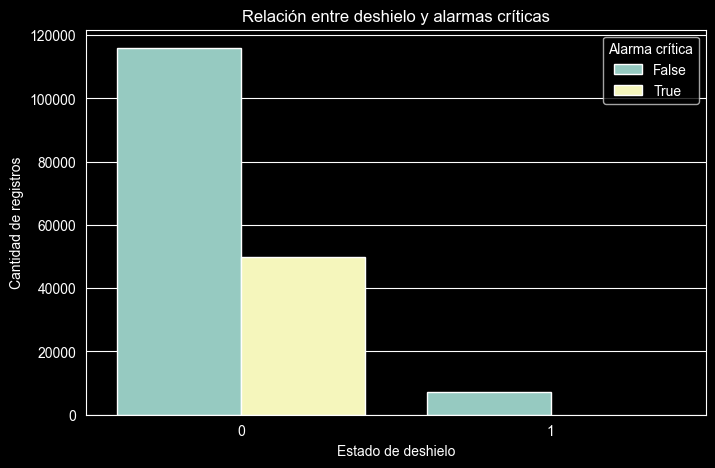

In [50]:
sns.countplot(
    data=df_eq,
    x="deshielo",
    hue="is_alarm_critical"
)
plt.title("Relación entre deshielo y alarmas críticas")
plt.xlabel("Estado de deshielo")
plt.ylabel("Cantidad de registros")
plt.legend(title="Alarma crítica")
plt.show()


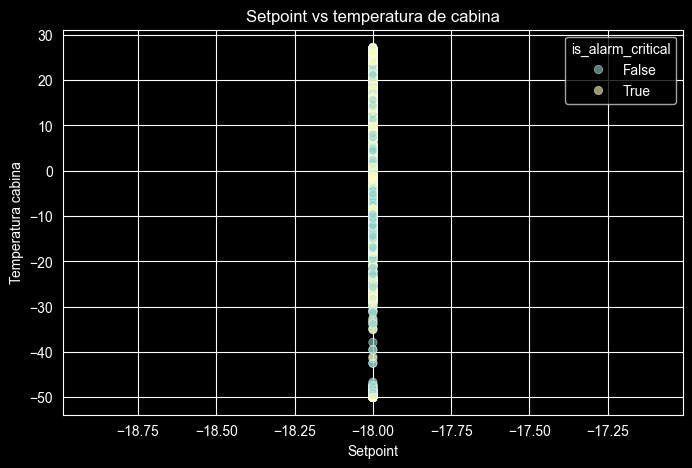

In [52]:
sns.scatterplot(
    data=df_eq.sample(5000),
    x="setpoint_objetivo",
    y="temp_cabina",
    hue="is_alarm_critical",
    alpha=0.6
)
plt.title("Setpoint vs temperatura de cabina")
plt.xlabel("Setpoint")
plt.ylabel("Temperatura cabina")
plt.show()


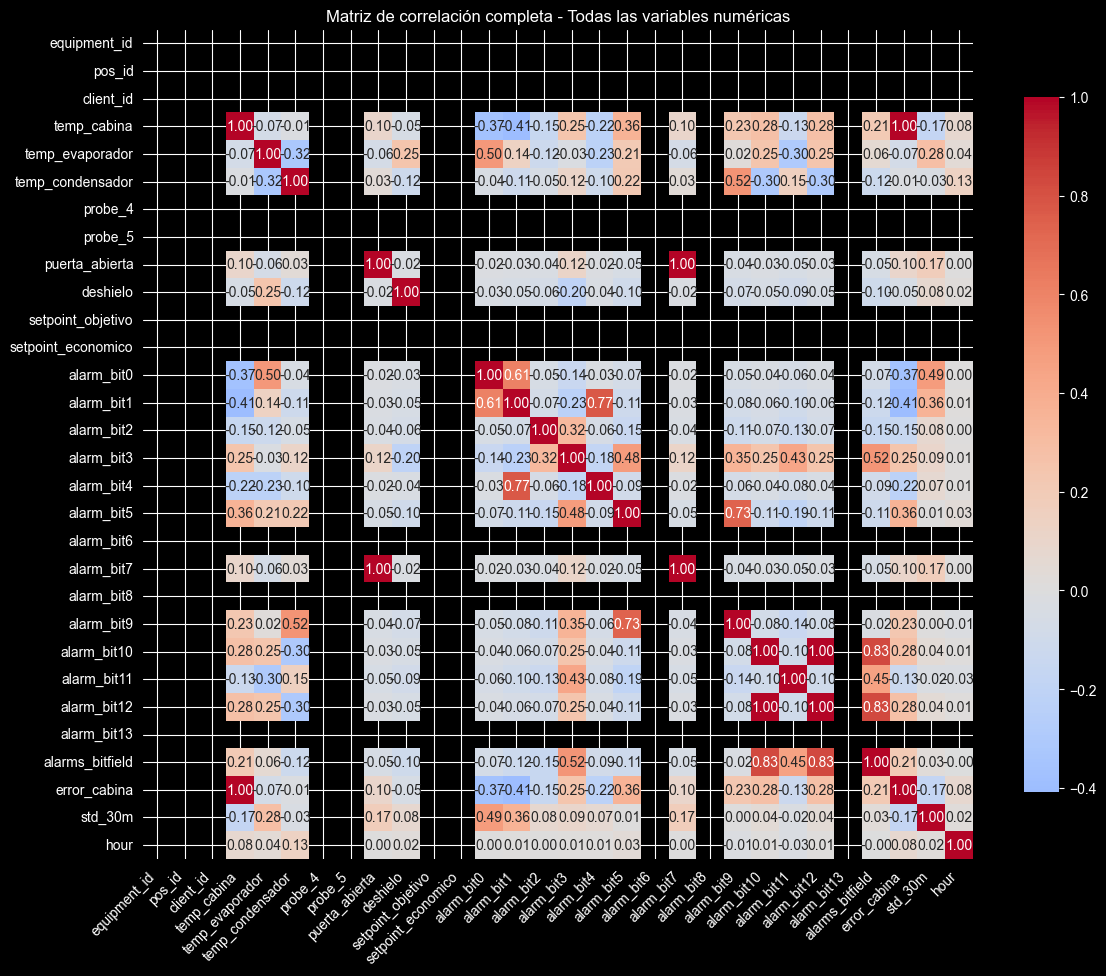

In [55]:
# Matriz de correlación completa (todas las variables numéricas)
numeric_columns = df_eq.select_dtypes(include=[np.number]).columns
corr_full = df_eq[numeric_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_full,
    cmap="coolwarm",
    center=0,
    annot=True,  # Muestra los números
    fmt='.2f',   # Formato con 2 decimales
    square=True,
    cbar_kws={'shrink': 0.8}
)
plt.title("Matriz de correlación completa - Todas las variables numéricas")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
_